# Daniel Park 1974 Car Dataset

Package and Datasets Imports

In [2]:
import pandas as pd
import numpy as np
import glob, os
import re
import plotly; plotly.__version__
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='notebook'
init_notebook_mode(connected=True)
df_mtcars = pd.read_csv('mtcars.csv')

## Dataset Observations

### General Dataset Overview

- Small Dataset
- Determine which car is the best within the year context

In [3]:
df_mtcars

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


### Dataset Description

In [4]:
d = {
    'Name': [
        'Car',
        'mpg', 
        'cyl', 
        'disp', 
        'hp', 
        'drat', 
        'wt', 
        'qsec', 
        'vs', 
        'am', 
        'gear',
        'carb'
    ],
    'Description': [
        'Make and Model of car',
        'Miles per Gallon', 
        'Number of Cylinders', 
        'Displacement (cubic inches)', 
        'Gross horsepower (hp)', 
        'Rear axle ratio',
        'Weight (in mutliples of 1000 lbs)',
        '1/4 mile time (seconds)',
        'Engine (0 = V-shaped, 1 = Straight)',
        'Transmission (0 = automatic, 1 = manual)',
        'Number of forward gears',
        'Number of carburetors'
    ]
}

df_columns = pd.DataFrame.from_dict(d)

df_columns

,Name,Description
0,Car,Make and Model of car
1,mpg,Miles per Gallon
2,cyl,Number of Cylinders
3,disp,Displacement (cubic inches)
4,hp,Gross horsepower (hp)
5,drat,Rear axle ratio
6,wt,Weight (in mutliples of 1000 lbs)
7,qsec,1/4 mile time (seconds)
8,vs,"Engine (0 = V-shaped, 1 = Straight)"
9,am,"Transmission (0 = automatic, 1 = manual)"


### Dataset Unseen Information

In [7]:
df_mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Car     32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


## What outside factor of car will affect miles per gallon the most?

In [36]:
df_weight = df_mtcars['wt'] # in multiple of 1000 lbs
df_weight

0     2.620
1     2.875
2     2.320
3     3.215
4     3.440
5     3.460
6     3.570
7     3.190
8     3.150
9     3.440
10    3.440
11    4.070
12    3.730
13    3.780
14    5.250
15    5.424
16    5.345
17    2.200
18    1.615
19    1.835
20    2.465
21    3.520
22    3.435
23    3.840
24    3.845
25    1.935
26    2.140
27    1.513
28    3.170
29    2.770
30    3.570
31    2.780
Name: wt, dtype: float64

In [11]:
df_test = df_mtcars['vs'].replace({0: 'V-shaped', 1: 'Straight'})
df_test

0     V-shaped
1     V-shaped
2     Straight
3     Straight
4     V-shaped
5     Straight
6     V-shaped
7     Straight
8     Straight
9     Straight
10    Straight
11    V-shaped
12    V-shaped
13    V-shaped
14    V-shaped
15    V-shaped
16    V-shaped
17    Straight
18    Straight
19    Straight
20    Straight
21    V-shaped
22    V-shaped
23    V-shaped
24    V-shaped
25    Straight
26    V-shaped
27    Straight
28    V-shaped
29    V-shaped
30    V-shaped
31    Straight
Name: vs, dtype: object

In [12]:
df_test = df_mtcars['am'].replace({0: 'Automatic', 1: 'Manual'})
df_test

0        Manual
1        Manual
2        Manual
3     Automatic
4     Automatic
5     Automatic
6     Automatic
7     Automatic
8     Automatic
9     Automatic
10    Automatic
11    Automatic
12    Automatic
13    Automatic
14    Automatic
15    Automatic
16    Automatic
17       Manual
18       Manual
19       Manual
20    Automatic
21    Automatic
22    Automatic
23    Automatic
24    Automatic
25       Manual
26       Manual
27       Manual
28       Manual
29       Manual
30       Manual
31       Manual
Name: am, dtype: object

### Displacement vs Miles per Gallon

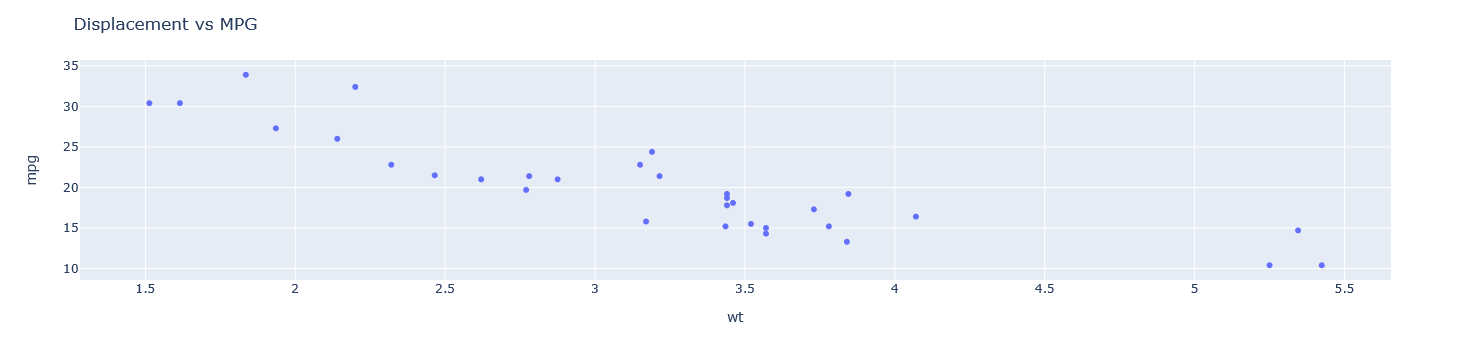

In [34]:
disp_mpg = px.scatter(
    df_mtcars, 
    x='wt', 
    y ='mpg',
    hover_data = ['Car']
)

disp_mpg.update_layout(title='Weight vs MPG')
disp_mpg.show()

The higher than the weight of the car, the lower the miles per gallon the vehicle is.

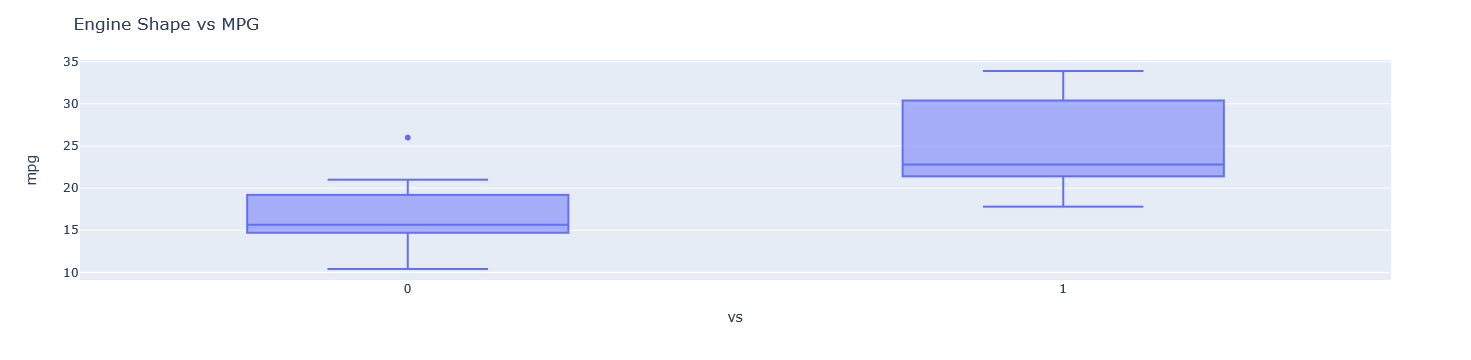

In [41]:
am_mpg = px.box(
    df_mtcars, 
    x='vs', 
    y ='mpg',
    hover_data = ['Car']
)

am_mpg.update_layout(title='Engine Shape vs MPG')
am_mpg.show()

On average, a Straight engine has more MPG than a V-shaped engine

### Transmission Type vs MPG

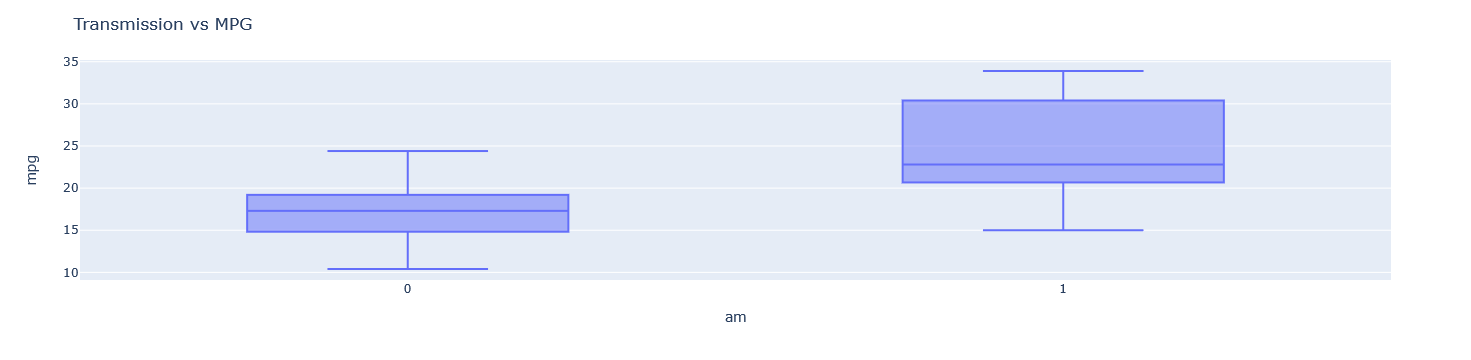

In [35]:
am_mpg = px.box(
    df_mtcars, 
    x='am', 
    y ='mpg',
    hover_data = ['Car']
)

am_mpg.update_layout(title='Transmission vs MPG')
am_mpg.show()

A manual car has, on average a lower mpg than a automatic car